In [10]:
import sqlite3 
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [11]:
create_table_sql = """
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price INTEGER
);
"""
cursor.execute(create_table_sql)
sales_data = [
    ('Laptop', 9, 1200),
    ('Mouse', 15, 25),
    ('Laptop', 3, 1200),
    ('Keyboard', 9, 75)
]


In [12]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM 
    sales 
GROUP BY 
    product
"""

df = pd.read_sql_query(query, conn)

--- Aggregated Sales Summary ---
    product  total_qty  revenue
0  Keyboard          9      675
1    Laptop          9    10800
2     Mouse         15      375


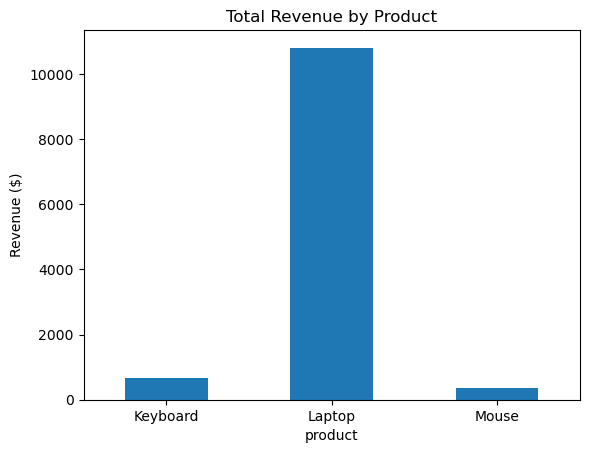

<Figure size 640x480 with 0 Axes>

In [15]:
print("--- Aggregated Sales Summary ---")
print(df)

df.plot(kind='bar', x='product', y='revenue', 
        title='Total Revenue by Product', legend=False)

plt.ylabel('Revenue ($)')
plt.xticks(rotation=0) 
plt.show()
plt.savefig("sales_chart.png")



In [14]:
conn.close()